In [23]:
import warnings
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv(r"C:\Users\HP\Downloads\heart (1).csv")

In [26]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
df['target'] = df['target'].astype('category').cat.codes

In [32]:
df = df.dropna()

In [33]:
X = df.drop("target", axis="columns")
Y = df["target"]

In [34]:
eChestPain = LabelEncoder()
eThal = LabelEncoder()
X['ChestPain_int'] = eChestPain.fit_transform(X['cp'])
X['Thal_int'] = eThal.fit_transform(X['thal'])  

In [35]:
X_int = X.drop(['cp', 'thal'], axis="columns")
X_train, X_test, Y_train, Y_test = train_test_split(X_int, Y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [37]:
reg = LogisticRegression()
reg.fit(X_train_scale, Y_train)

LogisticRegression()

In [38]:
Y_train_scale_predict = reg.predict(X_train_scale)
Y_test_scale_predict = reg.predict(X_test_scale)
# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_scale_predict)
test_accuracy = accuracy_score(Y_test, Y_test_scale_predict)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 87.20%
Test Accuracy: 79.51%


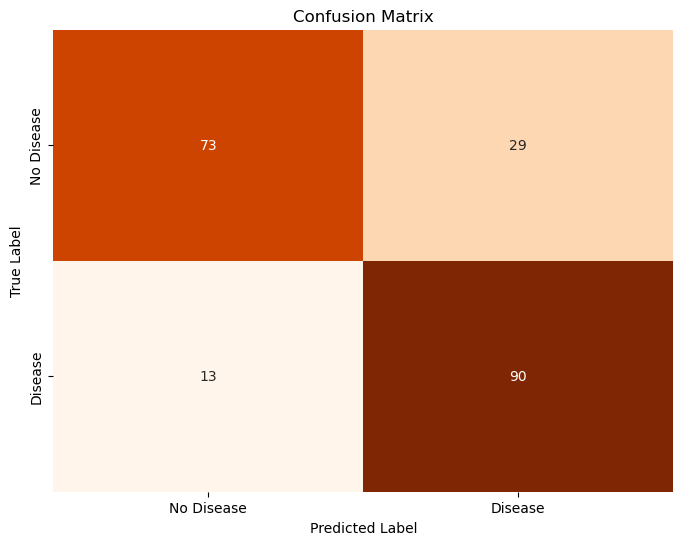


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.72      0.78       102
     Disease       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [39]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_scale_predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False, 
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_scale_predict, target_names=['No Disease', 'Disease']))
